# importamos datos


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from sklearn.impute import KNNImputer
import statsmodels.api as sm
import seaborn as sns
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
data.to_csv('/workspaces/machine-learning-joel/data/raw/AB_NYC_2019.csv',index=False)
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Obtenemos las dimenciones y la informacion del dataset


In [2]:
data.shape

(48895, 16)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

en esta caso podemos observar que tenemos un par de columnas en las que hay considerable cantidad de valores nulos como lo son last_review y reviews_per_month

In [4]:
data.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

aqui revizamos que no existan columnas con valores unicos que no nos servirian para el proyecto como lo vemos no es el caso 

# Empezamos con la limpieza de datos 


Revizamos si existen duplicados 

In [5]:
data.duplicated().sum()

0

revisamos la proporcion de valores nulos que tenemos en cara columna 

In [6]:
data.isnull().mean()*100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

en este caso podemos ver que las columnas "last_review"y"reviews_per_month" con nulas en el 20 porciento de las veces y que las variables name y host_name lo son en un porcentaje muy pequeño tenemso que decidir que hacer con las columnas "last_review" y "reviews_per_month" si direcvtamente no tenerlas en cuenta es decir eliminar las columnas o generar datos para estas para no tener que quitar tantos datos 

primero que nada nos vamos quitar las columnas "name","id","host_name" ya que estas considero que no son relevantes en nuestro analisis 

In [7]:
data.drop(['id','name','host_name'], axis=1, inplace=True)

Pasaremso a revizar que porcentaje total representan las variables nulas que nos quedan 

In [8]:
data.isnull().any(axis=1).sum()/len(data)*100

20.55833929849678

podenmos observar que representan el 20.5% si recordamos antes teniamos 2 columnas que tenian este mismo porcentaje cada una de valores nulos lo que quiere decir que seguramente exista un patron en el que cuando una es nula en la otra columna tambien lo sea de todas maneras revisaremos si este patron existe aunque ya lo podemos asumir 

<Axes: >

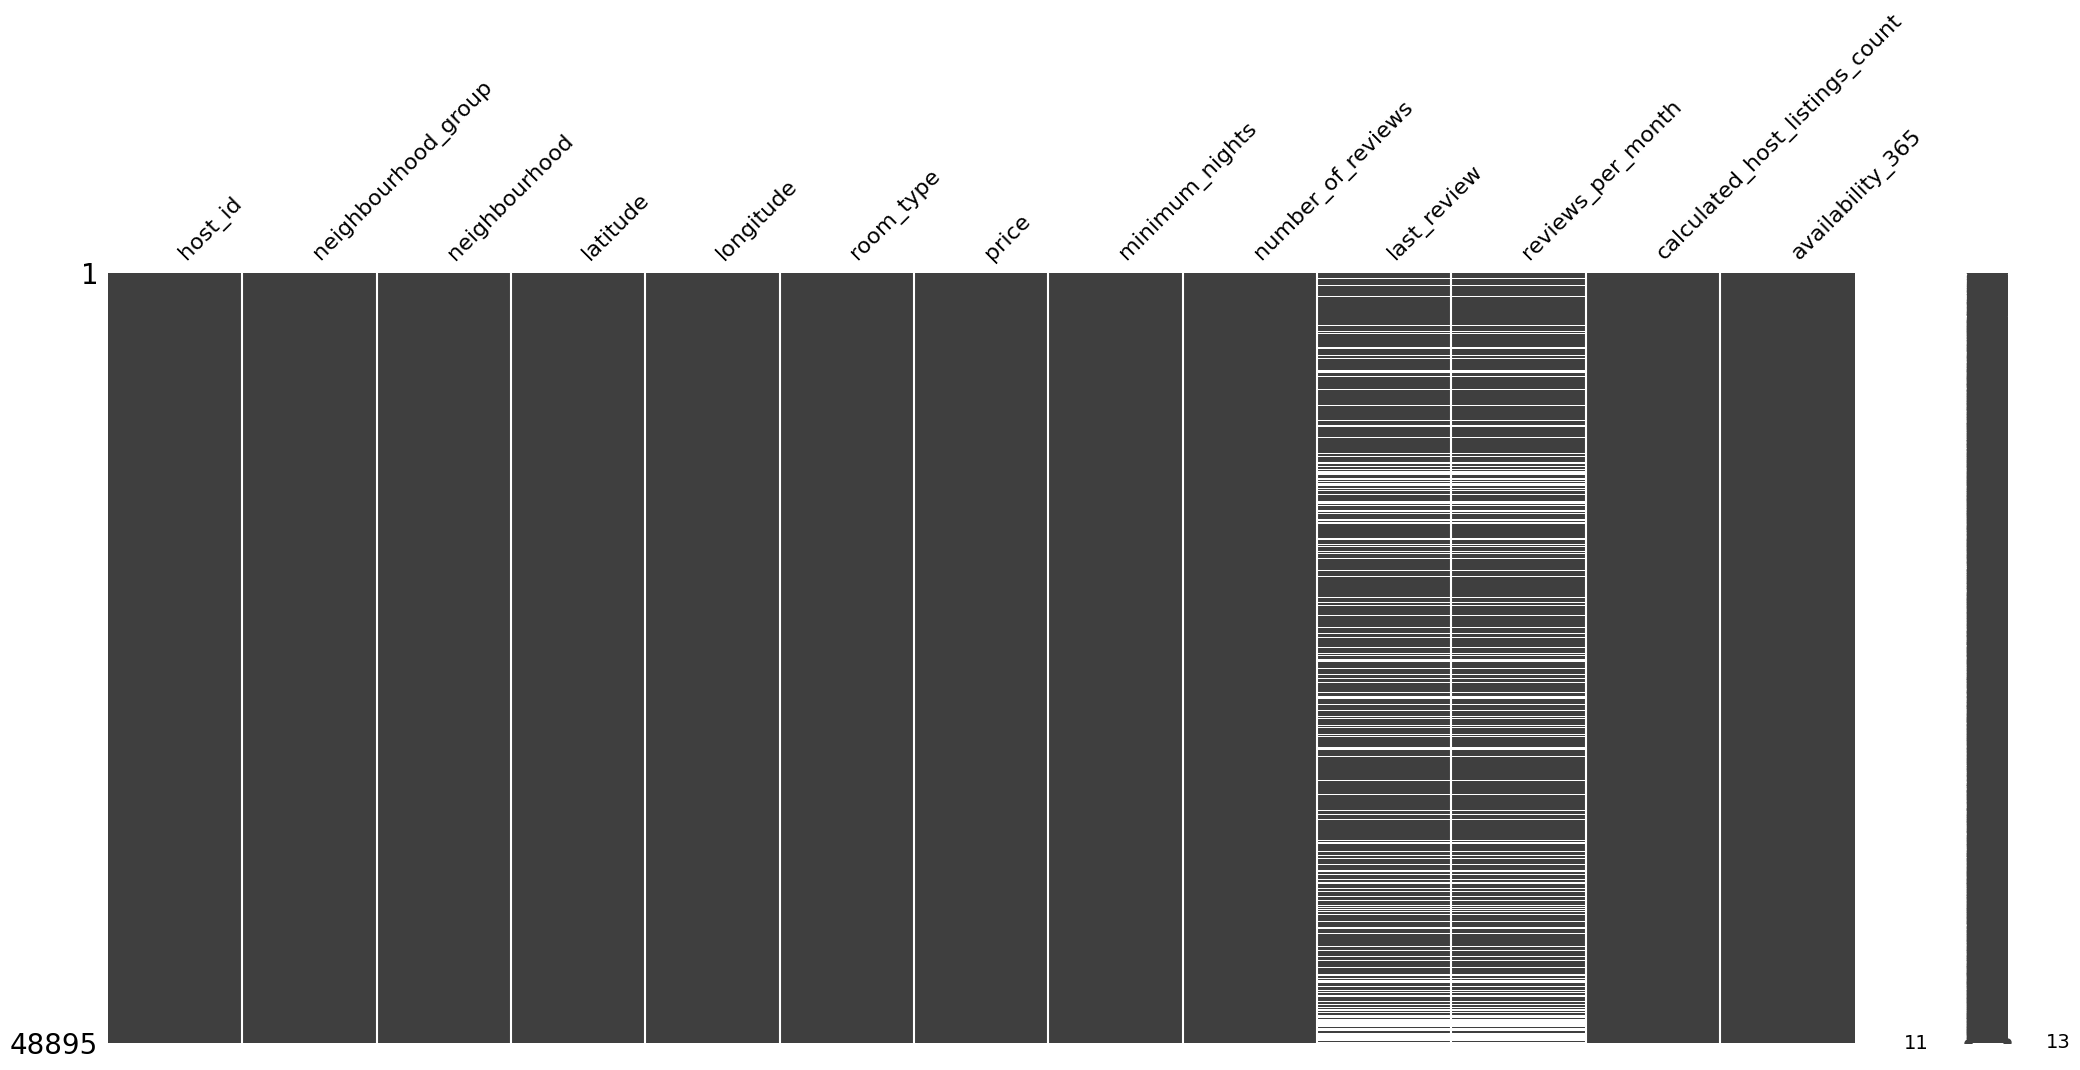

In [9]:
msno.matrix(data)

como podemos ver en la imagen existe un patron en el que si es nulo el valor en la columnaa de las_review en la columna de review_per_month tambien existe un valor nulo yo personalmente teniendo la columna de numbers_of_reviews que no tiene valores nulos me parecen irrelevantes los valores en estas 2 columnas para mi analisis asi que voy a proceder a eliminar las estas 2 ultimas 

In [10]:
data.drop(['last_review','reviews_per_month'], axis=1, inplace=True)

Revisamos nuevamente si existen valores nulos 

In [11]:
data.isnull().mean()*100

host_id                           0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

Ya no tenemos valores nulos  asi que procederemos con el analisis de Variables Categoricas 

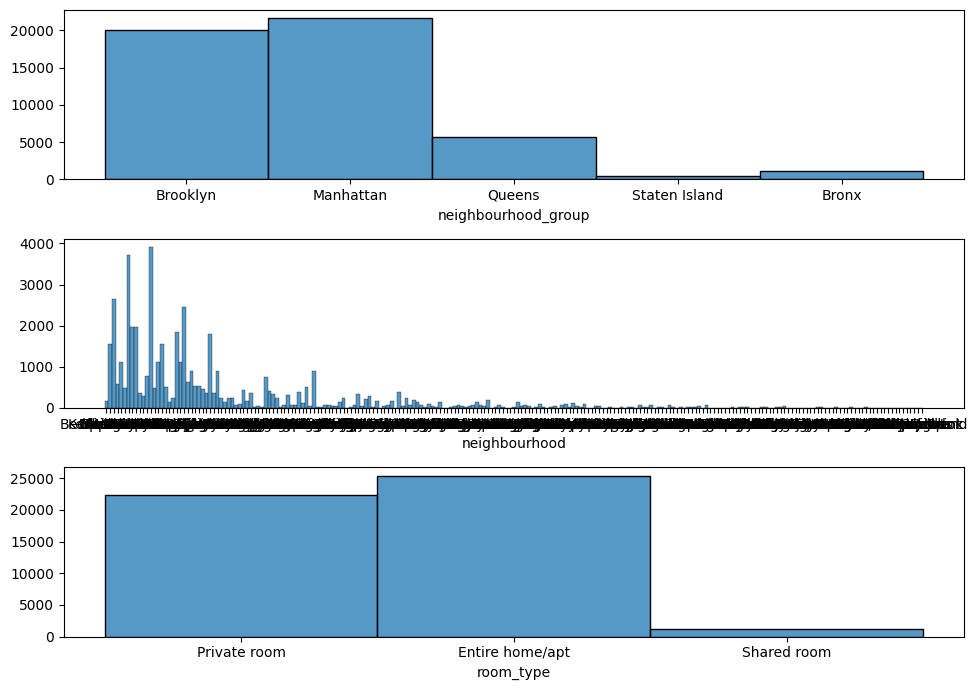

In [12]:
fig, axis = plt.subplots(3, figsize = (10, 7))

sns.histplot(ax = axis[0], data = data, x = 'neighbourhood_group').set(ylabel = None)
sns.histplot(ax = axis[1], data = data, x = 'neighbourhood').set(ylabel = None)
sns.histplot(ax = axis[2], data = data, x = 'room_type').set(ylabel = None)
plt.tight_layout()
plt.show()

neighbourhood_group: Podemos observar que en los barrios de Brooklyn y Manhattan se concentran la mayoria de arbnb esto debe ser producto a ser los barrios mas turisticos de la ciudad 

neighbourhood: en este caso tenemos muchas opciones hay que revisar si es relevante hacer el modelo utilizando unicamente la columna neighbourhood_group

room_type: podemos ver que no hay casi arbnb que sean cuartos compartidos seguramente sea la opcion menos demandada 

In [13]:
data.drop('neighbourhood',axis=1,inplace=True)

# Ahora pasamos a verificar la variable objetivo (precio):


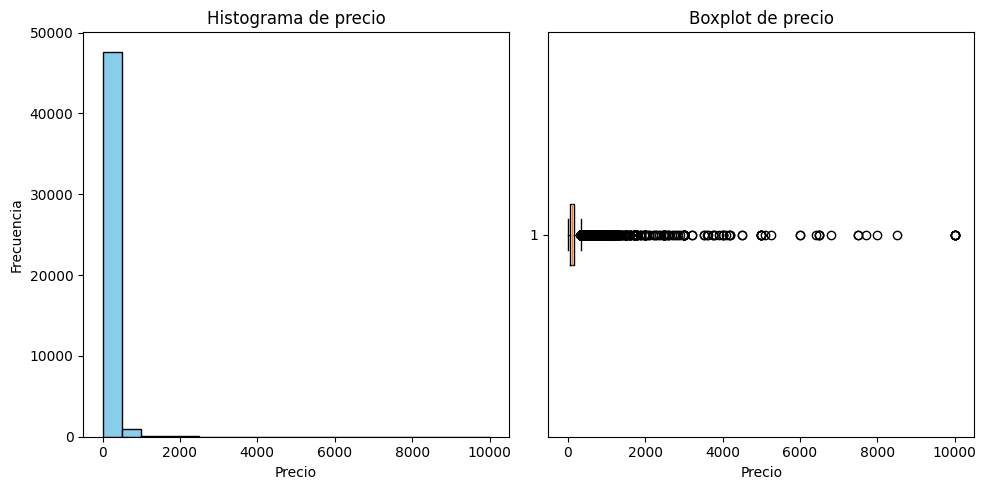

In [14]:

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(data['price'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de precio')
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Frecuencia')

ax[1].boxplot(data['price'], vert=False)
ax[1].set_title('Boxplot de precio')
ax[1].set_xlabel('Precio')

plt.tight_layout()
plt.show()


podemos observar que en este caso no podamos hacer un modelo con esta variable y tengamos que aplicarle una funcion a la misma para que esta pueda ser manejable y lo haremos con la funcion logaritmica 

In [15]:
sum(data['price'] < 1 )

11

Podemos observar quye existen arbnbs con valores que son menores a 1 lo que me pareve muy extraño vamos a proceder a quitar estos valores 

In [16]:
data = data[data.price>1]

In [17]:
data['log_price'] = np.log(data.price)

data.head()

,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,log_price
0,2787,Brooklyn,40.64749,-73.97237,Private room,149,1,9,6,365,5.003946
1,2845,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,5.416100
2,4632,Manhattan,40.80902,-73.94190,Private room,150,3,0,1,365,5.010635
3,4869,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,4.488636
4,7192,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,4.382027


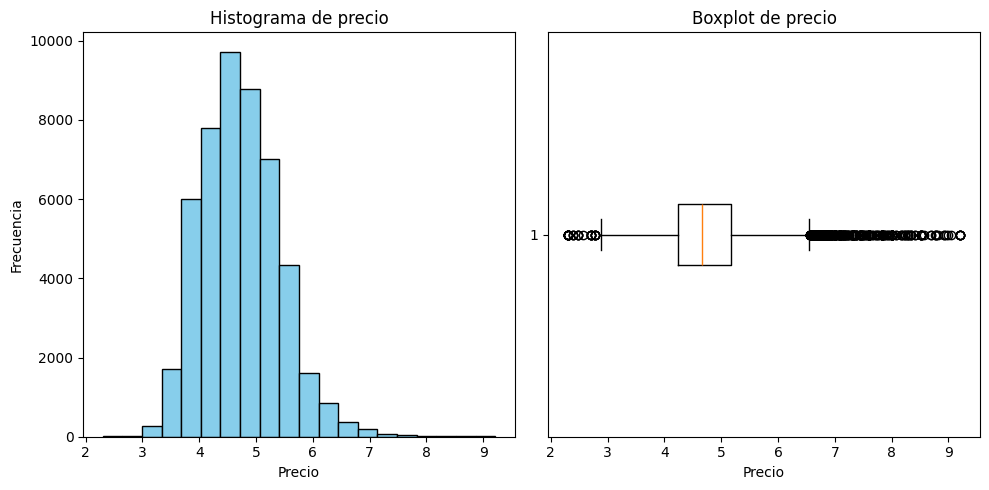

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(data['log_price'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de precio')
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Frecuencia')

ax[1].boxplot(data['log_price'], vert=False)
ax[1].set_title('Boxplot de precio')
ax[1].set_xlabel('Precio')

plt.tight_layout()
plt.show()

podemos observar las graficas mas simetricas que es lo quue buscamos

In [19]:
X = pd.get_dummies(data.drop(['price', 'log_price'], axis=1),drop_first=True)
X = X.astype(int)
y = data['log_price']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
cooks_distance = model.get_influence().cooks_distance

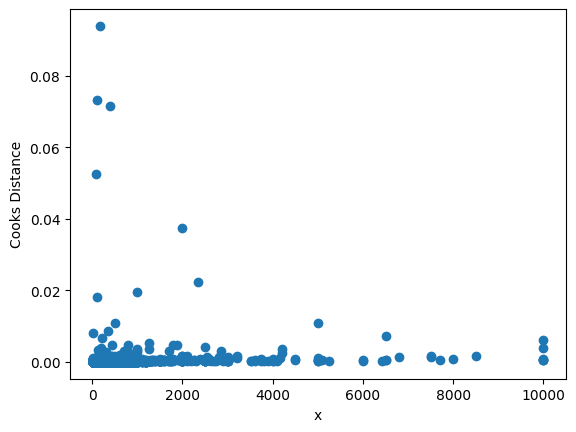

In [20]:
plt.scatter(data.price, cooks_distance[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

In [21]:
indices= np.where(cooks_distance[0]>0.005)[0]
data.iloc[indices]


,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,log_price
2854,6676776,Manhattan,40.71239,-74.01620,Entire home/apt,400,1000,0,1,362,5.991465
3398,4191006,Manhattan,40.73858,-74.00875,Private room,500,365,0,1,0,6.214608
5767,17550546,Manhattan,40.73293,-73.99782,Entire home/apt,180,1250,2,1,365,5.192957
9151,20582832,Queens,40.76810,-73.91651,Private room,10000,100,2,1,0,9.210340
13404,2697686,Manhattan,40.82915,-73.94034,Entire home/apt,99,999,2,1,42,4.595120
13788,53471415,Brooklyn,40.71141,-73.95155,Private room,1002,365,10,1,365,6.909753
13886,3710888,Brooklyn,40.67546,-73.97528,Private room,350,365,0,1,364,5.857933
17811,41870118,Queens,40.72064,-73.83746,Entire home/apt,2350,365,0,1,364,7.762171
20096,104911818,Brooklyn,40.69487,-73.96572,Private room,225,365,0,1,90,5.416100
21281,3737986,Manhattan,40.70588,-74.01590,Entire home/apt,12,300,0,1,0,2.484907


procedemos a quitar las filas 

In [22]:
list(indices)
data.drop(indices,inplace=True)


TypeError: could not convert string to float: 'Brooklyn'

In [23]:
dumies = pd.get_dummies(data[['neighbourhood_group','room_type']],drop_first=True)
data_int = pd.concat([data.drop(['neighbourhood_group','room_type'],axis=1,inplace=False),dumies],axis=1)

data_int.apply(lambda x: x.skew())



host_id                               1.205983
latitude                              0.237055
longitude                             1.285043
price                                18.772946
minimum_nights                       17.047653
number_of_reviews                     3.690588
calculated_host_listings_count        7.930909
availability_365                      0.763534
log_price                             0.601057
neighbourhood_group_Brooklyn          0.361337
neighbourhood_group_Manhattan         0.229130
neighbourhood_group_Queens            2.400161
neighbourhood_group_Staten Island    11.330540
room_type_Private room                0.174439
room_type_Shared room                 6.263148
dtype: float64

In [24]:
binary_cols = data_int[(data_int == 0)|(data_int == 1)].dropna(axis=1).columns
df_numerical = data_int.drop(binary_cols, axis=1)

In [25]:
def winsorize_column(column, lower, upper):
    q1 = column.quantile(lower)
    q3 = column.quantile(upper)
    iqr_value = q3-q1
    lower_bound = q1 - 1.5 * iqr_value
    upper_bound = q3 + 1.5 * iqr_value
    column = column.clip(lower=lower_bound, upper=upper_bound)
    return column


for column in df_numerical.columns:
    df_numerical[column] = winsorize_column(df_numerical[column], 0.25, 0.75)

In [26]:
df_numerical.apply(lambda x: x.skew())

host_id                           1.184776
latitude                          0.237269
longitude                         0.531747
price                             1.023783
minimum_nights                    1.287030
number_of_reviews                 1.228707
calculated_host_listings_count    1.153783
availability_365                  0.763534
log_price                         0.325685
dtype: float64

In [27]:
df_new = pd.concat([df_numerical, data_int[binary_cols]], axis=1)
df_new

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,log_price,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,2787.0,40.64749,-73.97237,149,1,9.0,3.5,365,5.003946,True,False,False,False,True,False
1,2845.0,40.75362,-73.98377,225,1,45.0,2.0,355,5.416100,False,True,False,False,False,False
2,4632.0,40.80902,-73.94190,150,3,0.0,1.0,365,5.010635,False,True,False,False,True,False
3,4869.0,40.68514,-73.95976,89,1,58.5,1.0,194,4.488636,True,False,False,False,False,False
4,7192.0,40.79851,-73.94399,80,10,9.0,1.0,0,4.382027,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441.0,40.67853,-73.94995,70,2,0.0,2.0,9,4.248495,True,False,False,False,True,False
48891,6570630.0,40.70184,-73.93317,40,4,0.0,2.0,36,3.688879,True,False,False,False,True,False
48892,23492952.0,40.81475,-73.94867,115,10,0.0,1.0,27,4.744932,False,True,False,False,False,False
48893,30985759.0,40.75751,-73.99112,55,1,0.0,3.5,2,4.007333,False,True,False,False,False,True


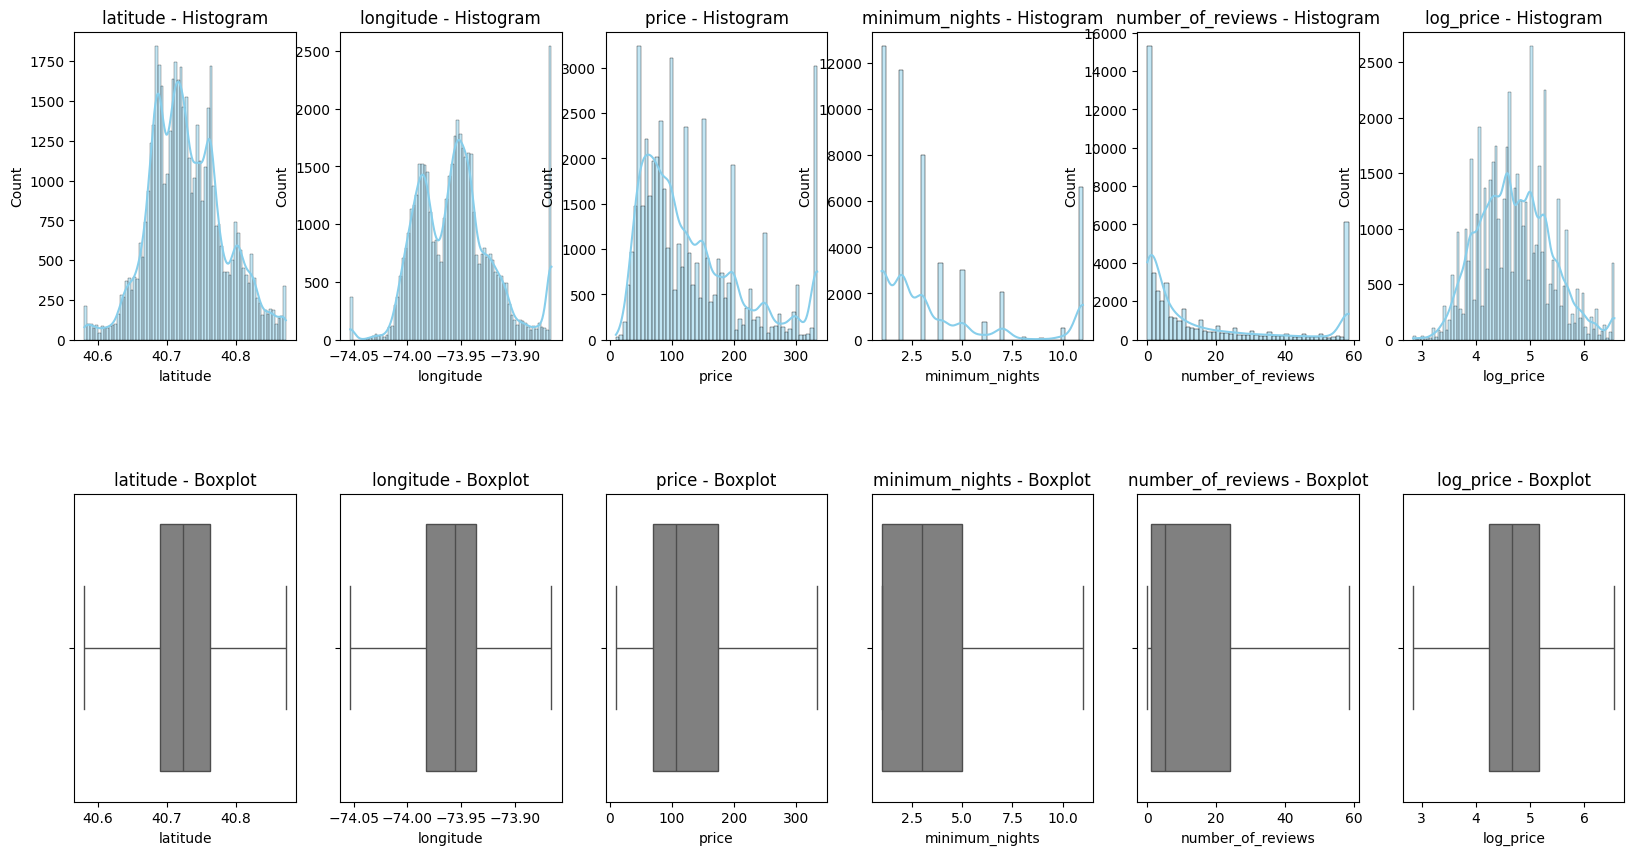

In [29]:
col_num = ["latitude","longitude","price","minimum_nights","number_of_reviews","log_price"]
fig, axes = plt.subplots(nrows=2, ncols=len(col_num), figsize=(20, 10))
fig.subplots_adjust(hspace=0.5)

# Plotear histogramas y boxplots
for i, col in enumerate(col_num):
    # Histograma
    sns.histplot(ax=axes[0, i], data=df_new, x=col, color='skyblue', kde=True)
    axes[0, i].set_title(f"{col} - Histogram")

    # Boxplot
    sns.boxplot(x=col, data=df_new, ax=axes[1, i], color='gray')
    axes[1, i].set_title(f"{col} - Boxplot")
plt.show()

Revisamos si existen errores tipograficos 